In [1]:
import os
import yaml
import numpy as np
from imaris.imaris import ImarisDataObject
from typing import List
import pandas as pd
import time
from tqdm.notebook import tqdm

In [2]:
data_path = "/Users/shehan/Documents/nih_projects/nih_parsers/data/filaments/NeuronDemo_with_objects.ims"
os.path.isfile(data_path)

True

In [3]:
parser = ImarisDataObject(data_path)

In [4]:
data = parser.data

In [5]:
data.get("Scene8").get("Content").keys()

<KeysViewHDF5 ['Filaments0', 'Filaments1', 'Points0']>

In [6]:
stats = data.get("Scene8").get("Content")["Filaments1"]["StatisticsValue"]
names = data.get("Scene8").get("Content")["Filaments1"]["StatisticsType"]

In [7]:
stats = pd.DataFrame(np.asarray(stats))
names = pd.DataFrame(np.asarray(names))

In [8]:
factor = parser.get_object_factor("Filaments0")

In [9]:
factor["Name"].unique()

array(['Collection', 'Distance', 'Radius', 'Depth', 'Type', 'Level',
       'Channel', 'Image'], dtype=object)

In [10]:
channel_info = factor[factor["Name"] == "Channel"]

In [11]:
surface_info = factor[factor["Name"] == "Surface"]

In [12]:
surface_info["Level"].unique()

array([], dtype=object)

* BREAK

In [13]:
from parsers.filament_parser import FilamentParserDistributed

In [14]:
filament_parser = FilamentParserDistributed(data_path, filament_id=1)

In [38]:
filament_parser.filament_names

['Filaments1']

In [39]:
inspect = filament_parser.inspect(0)

In [17]:
list(inspect.keys())

['filament_name',
 'stat_names_raw',
 'stat_values_raw',
 'object_id',
 'factor',
 'stat_names_channel_info',
 'stat_names_surface_info',
 'stat_values_filtered',
 'organized_stats',
 'stats_df']

In [18]:
inspect["filament_name"]

'Filaments1'

In [19]:
f = inspect["stat_names_channel_info"]["Name"].unique().tolist()

In [37]:
f

['Filament Area (sum)',
 'Filament BoundingBoxAA Length X',
 'Filament BoundingBoxAA Length Y',
 'Filament BoundingBoxAA Length Z',
 'Filament BoundingBoxOO Length A',
 'Filament BoundingBoxOO Length B',
 'Filament BoundingBoxOO Length C',
 'Filament Distance from Origin',
 'Filament Full Branch Depth',
 'Filament Full Branch Level',
 'Filament Generation',
 'Filament Length (sum)',
 'Filament No. Edges',
 'Filament No. Segment Branch Pts',
 'Filament No. Segment Branches',
 'Filament No. Segment Segments',
 'Filament No. Segment Terminal Pts',
 'Filament No. Sholl Intersections',
 'Filament No. Spine Branch Pts',
 'Filament No. Spine Segments',
 'Filament No. Spine Terminal Pts',
 'Filament No. Unconnected Parts',
 'Filament No. Vertices',
 'Filament Number of Filaments per Time Point',
 'Filament Number of Tracks',
 'Filament Position X',
 'Filament Position Y',
 'Filament Position Z',
 'Filament Segment Area (sum)',
 'Filament Segment Length (sum)',
 'Filament Segment Volume (sum)',

In [20]:
g = inspect["stat_names_surface_info"]["Name"].unique().tolist()

In [21]:
filtered_values = inspect["stat_values_filtered"]
filtered_values.head()

,ID_Time,ID_Object,ID_StatisticsType,Value
9,0,100000000,14498,22571.808594
10,0,100000000,14499,306.468506
11,0,100000000,14500,302.539795
12,0,100000000,14501,70.081779
13,0,100000000,14502,69.467552


In [22]:
# generate the distribution of the number of statistics for each object id
object_ids = inspect["object_id"]
num_stats_filtered = {obj_id: None for obj_id in object_ids}
num_stats_original = {obj_id: None for obj_id in object_ids}

for obj_id in tqdm(object_ids):
    obj_stats_f = filtered_values[filtered_values["ID_Object"] == obj_id]
    num_stats_filtered[obj_id] = len(obj_stats_f)

    obj_stats_o = stats[stats["ID_Object"] == obj_id]
    num_stats_original[obj_id] = len(obj_stats_o)

  0%|          | 0/2669 [00:00<?, ?it/s]

In [23]:
# compare the filtered stats vs raw stats
# this will allow us to confirm if the number of stats per object is the same

for obj_id in tqdm(object_ids):

    raw = num_stats_original[obj_id]
    fil = num_stats_filtered[obj_id]

    if raw == fil:
        pass
    else:
        print("ERROR")

  0%|          | 0/2669 [00:00<?, ?it/s]

In [24]:
inspect["stats_df"].shape

(2669, 4711)

In [25]:
final_stats = inspect["organized_stats"]

In [26]:
final_stats.keys()

dict_keys([100000000, 800000330, 800000331, 800000332, 800000333, 800000334, 800000335, 800000336, 800000337, 800000338, 800000339, 800000340, 800000341, 800000342, 800000343, 800000344, 800000345, 800000346, 800000347, 800000348, 800000349, 800000350, 800000351, 800000352, 800000353, 800000354, 800000355, 800000356, 800000357, 800000358, 800000359, 800000360, 800000361, 800000362, 800000363, 800000364, 800000365, 800000366, 800000367, 800000368, 800000369, 800000370, 800000371, 800000372, 800000373, 800000374, 800000375, 800000376, 800000378, 800000379, 800000380, 800000381, 800000382, 800000383, 800000384, 800000385, 800000386, 800000387, 800000389, 800000390, 800000391, 800000392, 800000393, 800000394, 800000395, 800000396, 800000397, 800000398, 800000399, 800000400, 800000401, 800000402, 800000403, 800000404, 800000405, 800000406, 800000408, 800000410, 800000411, 800000412, 800000413, 800000414, 800000415, 800000416, 800000417, 800000418, 800000420, 800000422, 800000423, 800000424,

In [27]:
510000006680 in final_stats.keys()

True

In [28]:
stats_len = []

for k, v in final_stats.items():

    stats_len.append(len(v))

(array([1.72e+03, 6.33e+02, 3.15e+02, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([  7. ,  49.6,  92.2, 134.8, 177.4, 220. , 262.6, 305.2, 347.8,
        390.4, 433. ]),
 <BarContainer object of 10 artists>)

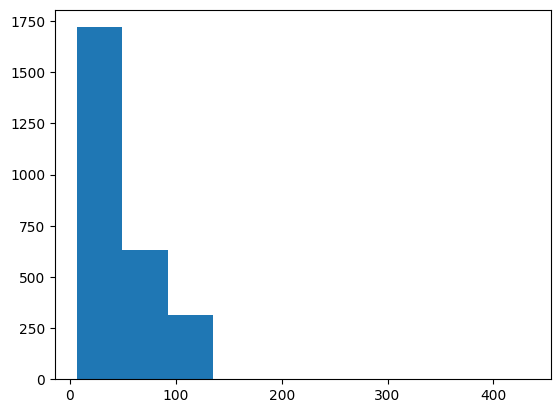

In [29]:
import matplotlib.pyplot as plt


plt.hist(stats_len)

In [30]:
np.unique(np.array(stats_len))

array([  7,   9,  10,  60,  78,  84,  85,  91,  94,  99, 101, 102, 433])

In [31]:
stats_df = inspect["stats_df"]
stats_df.head()

,Filament Area (sum),Filament BoundingBoxAA Length X,Filament BoundingBoxAA Length Y,Filament BoundingBoxAA Length Z,Filament BoundingBoxOO Length A,Filament BoundingBoxOO Length B,Filament BoundingBoxOO Length C,Filament Distance from Origin,Filament Full Branch Depth,Filament Full Branch Level,...,Spine Resistance Level_1,Spine Straightness Level_1,Spine Terminal Pt Diameter Level_1,Spine Terminal Pt Distance Level_1,Spine Terminal Pt Volume Level_1,Spine Time Level_1,Spine Time Index Level_1,Spine Volume Level_1,Spine Attachment Pt Branching Angle Level_1,Object_ID
100000000,22571.808594,306.468506,302.539795,70.081779,69.467552,307.937988,308.808807,242.691986,7.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000000
800000330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000330
800000331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000331
800000332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000332
800000333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000333


In [32]:
stats_df.columns.unique().tolist()

['Filament Area (sum)',
 'Filament BoundingBoxAA Length X',
 'Filament BoundingBoxAA Length Y',
 'Filament BoundingBoxAA Length Z',
 'Filament BoundingBoxOO Length A',
 'Filament BoundingBoxOO Length B',
 'Filament BoundingBoxOO Length C',
 'Filament Distance from Origin',
 'Filament Full Branch Depth',
 'Filament Full Branch Level',
 'Filament Generation',
 'Filament Length (sum)',
 'Filament No. Edges',
 'Filament No. Segment Branch Pts',
 'Filament No. Segment Branches',
 'Filament No. Segment Segments',
 'Filament No. Segment Terminal Pts',
 'Filament No. Sholl Intersections',
 'Filament No. Spine Branch Pts',
 'Filament No. Spine Segments',
 'Filament No. Spine Terminal Pts',
 'Filament No. Unconnected Parts',
 'Filament No. Vertices',
 'Filament Position X',
 'Filament Position Y',
 'Filament Position Z',
 'Filament Segment Area (sum)',
 'Filament Segment Length (sum)',
 'Filament Segment Volume (sum)',
 'Filament Spine Area (sum)',
 'Filament Spine Length (sum)',
 'Filament Spin

In [33]:
stats_df = inspect["stats_df"]

In [34]:
temp = stats_df[stats_df["Object_ID"] == 510000006680]
temp.head()

,Filament Area (sum),Filament BoundingBoxAA Length X,Filament BoundingBoxAA Length Y,Filament BoundingBoxAA Length Z,Filament BoundingBoxOO Length A,Filament BoundingBoxOO Length B,Filament BoundingBoxOO Length C,Filament Distance from Origin,Filament Full Branch Depth,Filament Full Branch Level,...,Spine Resistance Level_1,Spine Straightness Level_1,Spine Terminal Pt Diameter Level_1,Spine Terminal Pt Distance Level_1,Spine Terminal Pt Volume Level_1,Spine Time Level_1,Spine Time Index Level_1,Spine Volume Level_1,Spine Attachment Pt Branching Angle Level_1,Object_ID
510000006680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,510000006680


In [35]:
temp["Segment Center Intensity Mean Channel_3"]

KeyError: 'Segment Center Intensity Mean Channel_3'

In [36]:
temp.columns.unique().tolist()

['Filament Area (sum)',
 'Filament BoundingBoxAA Length X',
 'Filament BoundingBoxAA Length Y',
 'Filament BoundingBoxAA Length Z',
 'Filament BoundingBoxOO Length A',
 'Filament BoundingBoxOO Length B',
 'Filament BoundingBoxOO Length C',
 'Filament Distance from Origin',
 'Filament Full Branch Depth',
 'Filament Full Branch Level',
 'Filament Generation',
 'Filament Length (sum)',
 'Filament No. Edges',
 'Filament No. Segment Branch Pts',
 'Filament No. Segment Branches',
 'Filament No. Segment Segments',
 'Filament No. Segment Terminal Pts',
 'Filament No. Sholl Intersections',
 'Filament No. Spine Branch Pts',
 'Filament No. Spine Segments',
 'Filament No. Spine Terminal Pts',
 'Filament No. Unconnected Parts',
 'Filament No. Vertices',
 'Filament Position X',
 'Filament Position Y',
 'Filament Position Z',
 'Filament Segment Area (sum)',
 'Filament Segment Length (sum)',
 'Filament Segment Volume (sum)',
 'Filament Spine Area (sum)',
 'Filament Spine Length (sum)',
 'Filament Spin

In [ ]:
temp["Segment Center Intensity Mean Channel_3"]

In [ ]:
f = inspect["stat_names_channel_info"]["Name"].unique().tolist()

In [ ]:
d = inspect["factor"]
d.head()

In [ ]:
d[d["Name"] == "Image"]

In [ ]:
stats_names = inspect["stat_names_raw"]
from functools import partial


In [ ]:
stats_names["Name"].unique().tolist()

In [ ]:
# create function get channel number from a pandas row from stats_names
# inner func
def _get_channel_id(row_info, factor: pd.DataFrame):
    factor_id = row_info["ID_FactorList"]  # factor id
    name = row_info["Name"]  # stat name

    # filter factor to only include items related to Channel
    channel_info = factor[factor["Name"] == "Level"]

    # main logic to select the right channel given the factor id
    if factor_id in channel_info["ID_List"].to_list():
        channel = channel_info[channel_info["ID_List"] == factor_id][
            "Level"
        ].item()
        return f"{name} Level_{channel}"
    # if factor id is not in the channel list no channel info is needed
    else:
        return name

# create partial
get_channel_id_partial = partial(_get_channel_id, factor=factor)

# update stats name with the newly mapped stats names values
stats_names["Name"] = stats_names.apply(func=get_channel_id_partial, axis=1)


In [ ]:
stats_names["Name"].unique().tolist()

In [ ]:
stats_names

In [ ]:
# create function get channel number from a pandas row from stats_names
# inner func
def _get_channel_id(row_info, factor: pd.DataFrame):
    factor_id = row_info["ID_FactorList"]  # factor id
    name = row_info["Name"]  # stat name

    # filter factor to only include items related to Channel
    channel_info = factor[factor["Name"] == "Image"]

    # main logic to select the right channel given the factor id
    if factor_id in channel_info["ID_List"].to_list():
        channel = channel_info[channel_info["ID_List"] == factor_id][
            "Level"
        ].item()
        return f"Image_{channel}"
    # if factor id is not in the channel list no channel info is needed
    else:
        return name

# create partial
get_channel_id_partial = partial(_get_channel_id, factor=factor)

# update stats name with the newly mapped stats names values
stats_names["Name"] = stats_names.apply(func=get_channel_id_partial, axis=1)


In [ ]:
stats_names["Name"].unique().tolist()

In [ ]:
temp[temp.notnull()]

In [ ]:
temp.notna()

In [ ]:
from copy import deepcopy

fil = {}
t2 = deepcopy(temp).notna()

for colname in temp.columns:

    if temp[colname].isnull().item():
        pass
    else:
        fil[colname] = temp[colname]